# Double Pendulum

In [0]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [0]:
class double_pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    m_1 : float
        The upper mass on the double pendulum
    m_2 : float
        The lower mass on the double pendulum
    L_1 : float
        The length of the massless rod attached to a fix point and m_1
    L_2 : float
        The length of the massless rod attached to m_1 and m_2
    g : float
        The gravitational constant of acceleration

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m_1=1., m_2=1., L_1=1., L_2=1., g=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.L_1 = L_1
        self.L_2 = L_2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt, dphi_2/dt, d^2phi_2/dt^2, and d^2phi_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t), y[1] = phi_2(t),
            y[2] = dphi_1/dt, y[3] = dphi_2/dt, y[4] = d^2phi_1/dt^2, and y[5] = d^2phi_2/dt^2
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 = y

        c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

        theta1dot = z1
        z1dot = (self.m_2 * self.g * np.sin(theta2) * c - self.m_2 * s * (self.L_1 * z1 ** 2 * c + self.L_2 * z2 ** 2) -
                (self.m_1 + self.m_2) * self.g * np.sin(theta1)) / self.L_1 / (self.m_1 + self.m_2 * s ** 2)
        theta2dot = z2
        z2dot = ((self.m_1 + self.m_2) * (self.L_1 * z1 ** 2 * s - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c) + 
                self.m_2 * self.L_2 * z2 ** 2 * s * c) / self.L_2 / (self.m_1 + self.m_2 * s ** 2)
        return theta1dot, z1dot, theta2dot, z2dot
    
    def Lagrangian(self, m_1, m_2, L_1, L_2, g):
        """
        This function returns the Lagrangian.
        """
        
        U = -(self.m_1 + self.m_2) * self.g * self.L_1 * np.cos(y(0)) - self.m_2 * self.g * self.L_2 * np.cos(y(1))
            
        T = 0.5 * self.m_1 * (self.L_1 ** 2) * (y[2] ** 2) + 0.5 * self.m_2 * ((self.L_1 ** 2) * (y[2] ** 2) + (self.L_2 ** 2) * (y[3] ** 2) + 2 * self.L_1 * self.L_2 * y[2] * y[3] * np.cos(y[0] - y[1]))
        
        L = T - U
        
        return L
    
    def solve_ode(self, t_pts, phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_2, phi_dot_1, phi_dot_2 = solution.y

        return phi_1, phi_2, phi_dot_1, phi_dot_2

In [0]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [0]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [0]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L_1 = 1.
L_2 = 1.
g = 1.
m_1 = 1.
m_2 = 1.

# Instantiate a pendulum 
p1 = double_pendulum(L_1=L_1, L_2=L_2, g=g, m_1=m_1, m_2=m_2)


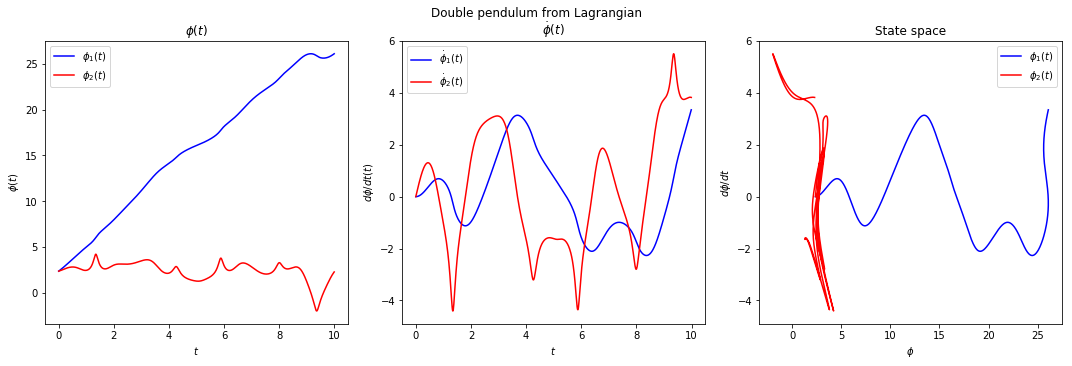

In [6]:
# both plots: same initial conditions
phi_0_1 = (3./4.)*np.pi
phi_0_2 = (3./4.)*np.pi
phi_dot_0_1 = 0.
phi_dot_0_2 = 0.
phi_1, phi_2, phi_dot_1, phi_dot_2 = p1.solve_ode(t_pts, phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian'
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            title=r'$\phi(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\phi_2(t)$', 
            title=r'$\phi(t)$', 
            ax=ax_a) 
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_dot_1[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=r'$\dot\phi_1(t)$', 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)    
plot_y_vs_x(t_pts[start : stop], phi_dot_2[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='red',
            label=r'$\dot\phi_2(t)$', 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            title='State space', 
            ax=ax_c)
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=r'$\phi_2(t)$', 
            title='State space', 
            ax=ax_c)

fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')  

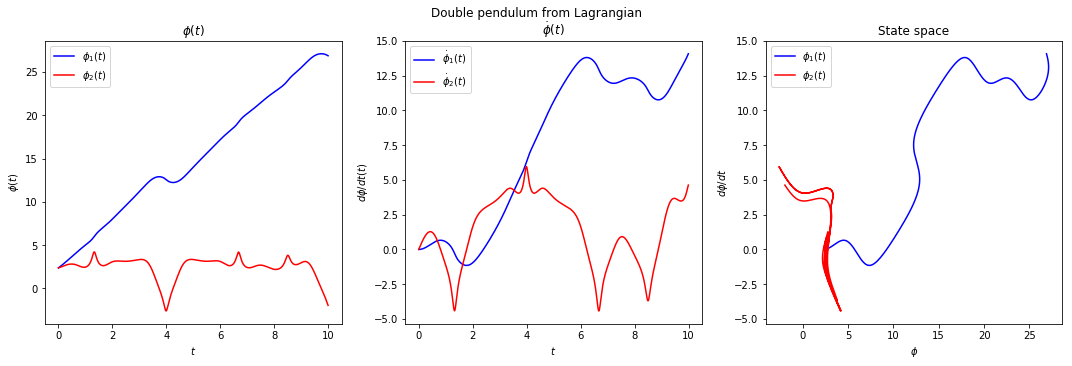

In [7]:
# both plots: same initial conditions
phi_0_1 = (3./4.)*np.pi + 0.01
phi_0_2 = (3./4.)*np.pi + 0.01
phi_dot_0_1 = 0.
phi_dot_0_2 = 0.
phi_1, phi_2, phi_dot_1, phi_dot_2 = p1.solve_ode(t_pts, phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian'
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            title=r'$\phi(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\phi_2(t)$', 
            title=r'$\phi(t)$', 
            ax=ax_a) 
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_dot_1[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=r'$\dot\phi_1(t)$', 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)    
plot_y_vs_x(t_pts[start : stop], phi_dot_2[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='red',
            label=r'$\dot\phi_2(t)$', 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            title='State space', 
            ax=ax_c)
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=r'$\phi_2(t)$', 
            title='State space', 
            ax=ax_c)

fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_2.png', bbox_inches='tight')

As can be seen in the two sets of graphs above, slightly changing the starting angle of the pendulum (in this cas by only 0.01 radians) results in drastically different movement. This is examplary of chaos because of the infitesimal sensitivity to starting conditions.

# Gravitational Orbits

In [0]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [0]:
class Orbit:
    """
    Potentials and associated differential equations for central force motion
    with gravitational potential.  Several algorithms for integration of 
    ordinary differential equations are now available. 
    """
    
    def __init__(self, ang_mom, G=1, M=1, m=1):
        self.ang_mom = ang_mom
        self.G = G
        self.M = M
        self.m = m
        self.mu = (M * m) / (M + m)
    
    def U(self, x_1, x_2, y_1, y_2):
        """Potential energy of the form U = G M m / r."""
        return self.G * self.M * self.m / np.sqrt((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2)
    
    def Ucf(self, x_1, x_2, y_1, y_2):
        """Centrifugal potential energy"""
        return self.ang_mom**2 / (2. * self.mu * ((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2))
    
    def Ueff(self, x_1, x_2, y_1, y_2):
        """Effective potential energy"""
        return self.U(x_1, x_2, y_1, y_2) + self.Ucf(x_1, x_2, y_1, y_2)
    
    def U_deriv_x1(self, x_1, x_2, y_1, y_2):
        """dU/dx1"""
        return self.G * self.M * self.m * (x_1 - x_2) / ((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 1.5
    
    def U_deriv_x2(self, x_1, x_2, y_1, y_2):
        """dU/dx2"""
        return -self.G * self.M * self.m * (x_1 - x_2) / ((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 1.5
      
    def U_deriv_y1(self, x_1, x_2, y_1, y_2):
        """dU/dy1"""
        return self.G * self.M * self.m * (y_1 - y_2) / ((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 1.5
    
    def U_deriv_y2(self, x_1, x_2, y_1, y_2):
        """dU/dy2"""
        return -self.G * self.M * self.m * (y_1 - y_2) / ((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 1.5
    
    def Ucf_deriv_x1(self, x_1, x_2, y_1, y_2):
        """dU_cf/dx1"""
        return -(self.ang_mom ** 2) * (x_1 - x_2) / (((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 2 * self.mu)
        
    def Ucf_deriv_x2(self, x_1, x_2, y_1, y_2):
        """dU_cf/dx2""" 
        return (self.ang_mom ** 2) * (x_1 - x_2) / (((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 2 * self.mu)
      
    def Ucf_deriv_y1(self, x_1, x_2, y_1, y_2):
        """dU_cf/dy1""" 
        return -(self.ang_mom ** 2) * (y_1 - y_2) / (((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 2 * self.mu)
      
    def Ucf_deriv_y2(self, x_1, x_2, y_1, y_2):
        """dU_cf/dy2""" 
        return (self.ang_mom ** 2) * (y_1 - y_2) / (((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2) ** 2 * self.mu)
        
    def Ueff_deriv_x1(self, x_1, x_2, y_1, y_2):
        """dU_eff/dx1"""
        return self.U_deriv_x1(x_1, x_2, y_1, y_2) + self.Ucf_deriv_x1(x_1, x_2, y_1, y_2)
      
    def Ueff_deriv_x2(self, x_1, x_2, y_1, y_2):
        """dU_eff/dx2"""
        return self.U_deriv_x2(x_1, x_2, y_1, y_2) + self.Ucf_deriv_x2(x_1, x_2, y_1, y_2)
      
    def Ueff_deriv_y1(self, x_1, x_2, y_1, y_2):
        """dU_eff/dy1"""
        return self.U_deriv_y1(x_1, x_2, y_1, y_2) + self.Ucf_deriv_y1(x_1, x_2, y_1, y_2)
      
    def Ueff_deriv_y2(self, x_1, x_2, y_1, y_2):
        """dU_eff/dy2"""
        return self.U_deriv_y2(x_1, x_2, y_1, y_2) + self.Ucf_deriv_y2(x_1, x_2, y_1, y_2)
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dx_1/dt, dx_2/dt, dy_1/dt, dy_2/dt,
        d^2x_1/dt^2, d^2x_2/dt^2, d^2y_1/dt^2, d^2y_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            8-component vector with y[0] = x_1(t), y[1] = x_2(t), y[2] = y_1(t),
            y[3] = y_2(t), y[4] = dx_1/dt, y[5] = dx_2/dt, y[6] = dy_1/dt,
            y[7] = dy_2/dt
            
        """
        return [ y[4], y[5], y[6], y[7], 
                -1./self.mu * self.Ueff_deriv_x1(y[0], y[1], y[2], y[3]), 
                -1./self.mu * self.Ueff_deriv_x2(y[0], y[1], y[2], y[3]),
                -1./self.mu * self.Ueff_deriv_y1(y[0], y[1], y[2], y[3]),
                -1./self.mu * self.Ueff_deriv_y2(y[0], y[1], y[2], y[3])]
    
    
    def solve_ode(self, t_pts, x_1_0, x_2_0, y_1_0, y_2_0, x_1_dot_0, x_2_dot_0, y_1_dot_0, y_2_dot_0,
                  method='RK23',
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x_1_0, x_2_0, y_1_0, y_2_0, x_1_dot_0, x_2_dot_0, y_1_dot_0, y_2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        x_1, x_2, y_1, y_2, x_1_dot, x_2_dot, y_1_dot, y_2_dot = solution.y
        return x_1, x_2, y_1, y_2, x_1_dot, x_2_dot, y_1_dot, y_2_dot
          
    
#    def energy(self, t_pts, x_1, x_2, y_1, y_2, x_1_dot, x_2_dot, y_1_dot, y_2_dot):
#        """Evaluate the energy as a function of time"""
#        return (self.mu/2.) * r_dot**2 + self.Ueff(r)

In [0]:
G = 1.  
M = 100. 
m = 1.
ang_mom = 2. 
o1 = Orbit(ang_mom, G=G, M=M, m=m)

# Plotting time 
t_start = 0.
t_end = 5.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
x_1_0 = 1.  #  1.
x_2_0 = 0.
y_1_0 = 0.
y_2_0 = 0.
x_1_dot_0 = 0.
x_2_dot_0 = 0.
y_1_dot_0 = 0.1
y_2_dot_0 = 0.
x_1, x_2, y_1, y_2, x_1_dot, x_2_dot, y_1_dot, y_2_dot = o1.solve_ode(t_pts, x_1_0, x_2_0, y_1_0, y_2_0, x_1_dot_0, x_2_dot_0, y_1_dot_0, y_2_dot_0)


#c = o1.ang_mom**2 / (np.abs(o1.k) * o1.mu)
#epsilon = c / r_0 - 1.
#energy_0 = o1.mu/2. * r_dot_0**2 + o1.Ueff(r_0)
#print(f'energy = {energy_0:.2f}')
#print(f'eccentricity = {epsilon:.2f}')

In [59]:
r_pts_1 = []
r_pts_2 = []
phi_pts_1 = []
phi_pts_2 = []
for i in range(len(x_1)):
    r_pts_1.append(np.sqrt(x_1[i]**2 + y_1[i]**2))
    r_pts_2.append(np.sqrt(x_2[i]**2 + y_2[i]**2))
    phi_pts_1.append(np.arctan(y_1[i] / x_1[i]))
    phi_pts_2.append(np.arctan(y_2[i] / x_2[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


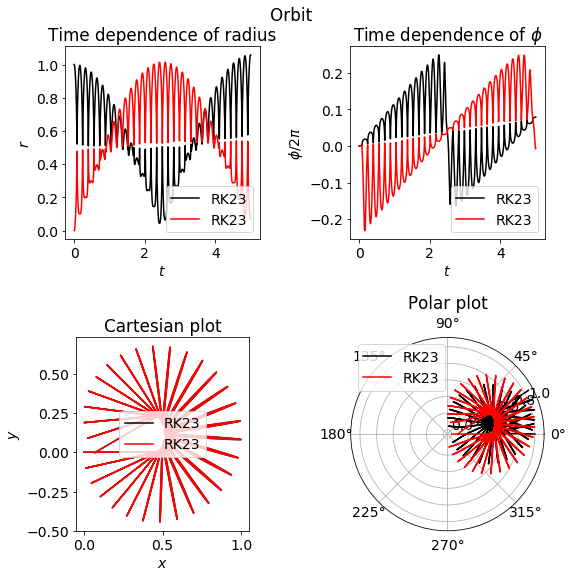

In [60]:
fig_4 = plt.figure(figsize=(8,8))

overall_title = 'Orbit'
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(2,2,1)
ax_4a.plot(t_pts, r_pts_1, color='black', label='RK23')
ax_4a.plot(t_pts, r_pts_2, color='red', label='RK23')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$r$')
ax_4a.set_title('Time dependence of radius')
ax_4a.legend()

ax_4b = fig_4.add_subplot(2,2,2)
ax_4b.plot(t_pts, np.asarray(phi_pts_1)/(2.*np.pi), color='black', label='RK23')
ax_4b.plot(t_pts, np.asarray(phi_pts_2)/(2.*np.pi), color='red', label='RK23')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$\phi/2\pi$')
ax_4b.set_title(r'Time dependence of $\phi$')
ax_4b.legend()

ax_4c = fig_4.add_subplot(2,2,3)
ax_4c.plot(np.asarray(r_pts_2)*np.cos(np.asarray(phi_pts_2)), np.asarray(r_pts_2)*np.sin(np.asarray(phi_pts_2)), color='black', label='RK23')
ax_4c.plot(np.asarray(r_pts_2)*np.cos(np.asarray(phi_pts_2)), np.asarray(r_pts_2)*np.sin(np.asarray(phi_pts_2)), color='red', label='RK23')
ax_4c.set_xlabel(r'$x$')
ax_4c.set_ylabel(r'$y$')
ax_4c.set_aspect('equal')
ax_4c.set_title('Cartesian plot')
ax_4c.legend()

ax_4d = fig_4.add_subplot(2,2,4, polar=True)
ax_4d.plot(phi_pts_1, r_pts_1, color='black', label='RK23')
ax_4d.plot(phi_pts_2, r_pts_2, color='red', label='RK23')
ax_4d.set_title('Polar plot', pad=20.)
ax_4d.legend()


fig_4.tight_layout()
fig_4.savefig('orbit_1.png', dpi=200, bbox_inches='tight')



Having trouble finding the perfect starting conditions to induce normal orbiting behavior.

If M is much larger than m then the orbit of m around M will become nearly circular. If we also take M to be our CM intertial frame then the orbital equation for m will be that of one that is orbiting around some stationary point in space.